<a href="https://colab.research.google.com/github/swapnilsethi/Data-Mining/blob/main/DM_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
pd.pandas.set_option('display.max_columns',None) #to display all columns in output

In [ ]:
#read train data from github
URL = "https://raw.githubusercontent.com/swapnilsethi/Data-Mining/master/HW3_Boulder_NPO.csv"
#data = pd.read_csv('train.csv')
df = pd.read_csv(URL)
df

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
0,862,2010,GF,HSF,Boulder Outreach for Homeless Overflow,Emergency Warming Centers,NaN,NaN,5000.0,NaN
1,1262,2002,GF,HSF,Clinica Campesina Family Health Care Services,Maternity Program,NaN,NaN,30224.0,NaN
2,1930,1997,GF,HSF,Safehouse Progressive Alliance for Nonviolence,Counseling and Advocacy Services,NaN,NaN,27500.0,NaN
3,560,2013,GF,CEF,Village Arts Coalition,International Festival,NaN,1600.0,1600.0,NaN
4,870,2009,GF,YOP,Boulder Museum of Contemporary Art,Engage & Reflect: The Studio Project,NaN,-12500.0,9400.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1953,153,2019,HEF,HEF,FC Boulder,Soccer for a Healthy Life - Mental Health and ...,Funding will provide healthy lifestyle coachin...,95525.0,0.0,0.0
1954,334,2017,GF,HOM,Bridge House,Severe Weather Shelter,Overnight severe weather sheltering to adults ...,0.0,100000.0,91752.0
1955,1480,2007,GF,HSF,Children's House Preschool,First Chance Scholarship Fund,NaN,NaN,21836.0,21389.0
1956,1712,1999,GF,HSF,Boulder American Indian Parent Committee,Drop Out Prevention and Cultural Events,NaN,NaN,19000.0,17978.0


### Big picture of the raw dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ObjectId          1958 non-null   int64  
 1   Year              1958 non-null   int64  
 2   Fund              1958 non-null   object 
 3   Workgroup         1958 non-null   object 
 4   Organization      1958 non-null   object 
 5   Program           1949 non-null   object 
 6   Program_Summary   470 non-null    object 
 7   Amount_Requested  793 non-null    float64
 8   Amount_Funded     1941 non-null   float64
 9   Amount_Spent      1943 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 153.1+ KB


We have a total of 1958 entires in the dataset, and the majority of the values for column program summary, Amount Requested are blank.

In [ ]:
df.describe()

,ObjectId,Year,Amount_Requested,Amount_Funded,Amount_Spent
count,1958.000000,1958.000000,793.000000,1941.000000,1.943000e+03
mean,979.500000,2008.666496,29241.674767,35256.816862,3.391211e+04
std,565.370233,7.210933,60114.316117,56876.095091,6.343183e+04
min,1.000000,1994.000000,-12500.000000,0.000000,0.000000e+00
25%,490.250000,2003.000000,3000.000000,6145.000000,5.312000e+03
50%,979.500000,2010.000000,11146.000000,16280.000000,1.515500e+04
75%,1468.750000,2015.000000,17620.000000,40000.000000,3.831750e+04
max,1958.000000,2019.000000,418457.000000,877303.000000,1.540000e+06


### Handling Errors

It is critical to handle mistakes and avoid calculation errors before substituting missing data with mean, mode, and median.

If you see that the minimum amount requested is a negative value, you should know that the requested amount for the program cannot be negative. Let's take a closer look at it.

In [ ]:
df[df['Amount_Requested']<0]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
4,870,2009,GF,YOP,Boulder Museum of Contemporary Art,Engage & Reflect: The Studio Project,NaN,-12500.0,9400.0,NaN



Only one row has a requested amount less than zero and a financed amount larger than zero. I'm going to use the +ve 12500 instead. (Though it is not a good practice to substitute this value with any value, I chose this option due to time constraints.) In my opinion, the best method is to look at the average percent of amount financed over requested amount for each program and then calculate this figure.

In [ ]:
df['Amount_Requested'] = df['Amount_Requested'].replace(-12500, 12500)

In [ ]:
df.describe()

,ObjectId,Year,Amount_Requested,Amount_Funded,Amount_Spent
count,1958.000000,1958.000000,793.000000,1941.000000,1.943000e+03
mean,979.500000,2008.666496,29273.200618,35256.816862,3.391211e+04
std,565.370233,7.210933,60098.951253,56876.095091,6.343183e+04
min,1.000000,1994.000000,0.000000,0.000000,0.000000e+00
25%,490.250000,2003.000000,3000.000000,6145.000000,5.312000e+03
50%,979.500000,2010.000000,11146.000000,16280.000000,1.515500e+04
75%,1468.750000,2015.000000,17620.000000,40000.000000,3.831750e+04
max,1958.000000,2019.000000,418457.000000,877303.000000,1.540000e+06


Now, compare the amount funded to the amount sought; the amount funded should be lower than the amount requested, and the amount spent should be lower than the amount funded.

In [ ]:
df[df['Amount_Requested']<df['Amount_Funded']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
76,308,2018,HEF,HEF,Boulder County Farmers Market,Farmers Market Food Assistance Incentives,Funding will be used to increase access to Dou...,64156.0,136156.0,122696.0
104,265,2017,GF,HSF,Boulder County AIDS Project,HIV Care Services,"Comprehensive HIV medical case mgmt, testing &...",0.0,25000.0,24546.0
122,290,2017,GF,HSF,Family Learning Center,Pathways to Success for Youth Development,NaN,0.0,10000.0,9947.0
123,285,2017,GF,HSF,Community Action Development Corporation,Circles Campaign,NaN,0.0,10000.0,9495.0
148,273,2017,GF,HSF,Boulder Outreach for Homeless Overflow,Emergency Warming Centers,NaN,0.0,69750.0,69732.0
...,...,...,...,...,...,...,...,...,...,...
1841,280,2017,GF,HSF,BV Women's Health Center,Subsidized Reproduction and Sexual Health Serv...,NaN,0.0,98000.0,91189.0
1846,165,2018,GF,HSF,Community Action Development Corporation,Circles Campaign,"Financial education, asset-building and opport...",10000.0,20000.0,19500.0
1869,275,2017,GF,HSF,Boulder Valley School District,Boulder High: Adelante! After School Program,NaN,0.0,30000.0,29201.0
1941,246,2018,GF,RMJ,Boulder County Community Services,Substance Education and Awareness,Community-wide substance abuse prevention and ...,0.0,205000.0,204788.0


There are 69 rows where the requested amount is less than the financed amount, but most of the time data is absent, so let's look at the rows where data is available.

In [ ]:
df[(df['Amount_Requested']<df['Amount_Funded']) & (df['Amount_Requested']>0)]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
76,308,2018,HEF,HEF,Boulder County Farmers Market,Farmers Market Food Assistance Incentives,Funding will be used to increase access to Dou...,64156.0,136156.0,122696.0
162,500,2013,GF,CEF,Barrio E,Bomba Dance and Theater - plan and promote,NaN,1600.0,3000.0,2881.0
225,807,2010,GF,YOP,Boulder Parks and Recreation,Getting Fit Program,NaN,8480.0,8734.0,8065.0
458,967,2008,GF,YOP,Boulder Parks and Recreation,Getting Fit Program,NaN,5920.0,6098.0,5634.0
630,837,2012,GF,YOP,Boulder Parks and Recreation,Getting Fit Program,NaN,12725.0,13107.0,12173.0
...,...,...,...,...,...,...,...,...,...,...
1589,345,2017,GF,HRF,Boulder School for German Language and Culture,Advent Celebration and Craft Making,NaN,280.0,350.0,329.0
1595,261,2017,GF,HRF,Second Baptist Church,Thanksgiving Dinner for Homeless Populations,NaN,1935.0,2650.0,2400.0
1679,775,2013,GF,YOP,Attention Homes,Educational and Extracurricular Program Component,NaN,15000.0,15450.0,14821.0
1822,69,2018,GF,HRF,Boulder Showing up for Racial Justice,Anti-Racist Education,NaN,2000.0,2500.0,2354.0


Now I'm left with no choice but to calculate Avg percent amount funded vs. amount requested for error-free data.

In [ ]:
error_free_amount_requested_and_funded_data = df[df['Amount_Requested']>=df['Amount_Funded']]

In [ ]:
from numpy.lib.function_base import average
average(error_free_amount_requested_and_funded_data['Amount_Funded']/error_free_amount_requested_and_funded_data['Amount_Requested'])

0.5855902146523043

Because an average of 58.56 percent of the requested amount gets funded, I'm estimating the value of the funded amount.

But first, we must check for errors in both the funded and spent amounts. In rare circumstances, it's possible that the amount spent exceeds the amount budgeted. So let's investigate.

In [ ]:
df[df['Amount_Spent']>df['Amount_Funded']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
21,642,2014,GF,CEF,Boulder Asian Pacific Alliance (BAPA),Annual Boulder Asian Festival,NaN,1600.0,1600.0,1540000.0


Ohh.. great, we have only one entry where this condition is true and looks like this is off limit. Let's calculate Avg % spent of funded amount to solve this error.

But, first let's filter error free entiries for the same

In [ ]:
error_free_amount_funded_and_spent_data = df[(df['Amount_Spent']<=df['Amount_Funded']) & df['Amount_Funded'] != 0]

In [ ]:
average(error_free_amount_funded_and_spent_data['Amount_Spent']/error_free_amount_funded_and_spent_data['Amount_Funded'])

0.9498565466765976

So, 94.99% of amount funded is spent. We will replace 1540000.0 with 94.99% of amount_funded value.

In [ ]:
df['Amount_Spent'] = df['Amount_Spent'].replace(1540000.0, 1600*0.9499)

In [ ]:
df[df['Amount_Spent']>df['Amount_Funded']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent


Now, let's calculate amount requested values from amount funded values.

In [ ]:
df.loc[(df['Amount_Requested']<df['Amount_Funded']), 'Amount_Requested'] = df['Amount_Funded']/0.5856

In [ ]:
df[(df['Amount_Requested']<df['Amount_Funded'])]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent


In [ ]:
df.loc[76]

ObjectId                                                          308
Year                                                             2018
Fund                                                              HEF
Workgroup                                                         HEF
Organization                            Boulder County Farmers Market
Program                     Farmers Market Food Assistance Incentives
Program_Summary     Funding will be used to increase access to Dou...
Amount_Requested                                        232506.830601
Amount_Funded                                                136156.0
Amount_Spent                                                 122696.0
Name: 76, dtype: object

### Handling missing values

Let's take a look at rows where program is NaN

In [ ]:
from numpy.core.numeric import NaN
NaN_program_df=df[df['Program'].isna()]
NaN_program_df

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
593,1859,1998,GF,HSF,Women's Source,NaN,NaN,NaN,22000.0,20360.0
619,1933,1997,GF,HSF,Women's Source,NaN,NaN,NaN,22000.0,20162.0
1465,795,2015,GF,MLK,Boulder Friends,NaN,NaN,930.0,930.0,876.0
1551,1613,1999,GF,HSF,Women's Source,NaN,NaN,NaN,22550.0,20768.0
1777,1631,1998,GF,HSF,Boulder Youth Center,NaN,NaN,NaN,23800.0,23439.0
1803,1880,1996,GF,HSF,Women's Source,NaN,NaN,NaN,21387.0,19577.0
1871,1878,1996,GF,HSF,United Mexican Community of Boulder,NaN,NaN,NaN,14900.0,14789.0
1878,769,2013,GF,MLK,Boulder Friends,NaN,NaN,770.0,770.0,744.0
1899,1407,2001,GF,HSF,National Alliance for the Mentally Ill (NAMI),NaN,NaN,NaN,1500.0,1382.0


In [ ]:
NaN_program_organzization = NaN_program_df['Organization'].unique()

In [ ]:
NaN_program_organzization

array(["Women's Source", 'Boulder Friends', 'Boulder Youth Center',
       'United Mexican Community of Boulder',
       'National Alliance for the Mentally Ill (NAMI)'], dtype=object)

Select program from above organization

In [ ]:
df[df['Organization'].isin(NaN_program_organzization)]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
593,1859,1998,GF,HSF,Women's Source,NaN,NaN,NaN,22000.0,20360.0
619,1933,1997,GF,HSF,Women's Source,NaN,NaN,NaN,22000.0,20162.0
1465,795,2015,GF,MLK,Boulder Friends,NaN,NaN,930.0,930.0,876.0
1551,1613,1999,GF,HSF,Women's Source,NaN,NaN,NaN,22550.0,20768.0
1777,1631,1998,GF,HSF,Boulder Youth Center,NaN,NaN,NaN,23800.0,23439.0
1803,1880,1996,GF,HSF,Women's Source,NaN,NaN,NaN,21387.0,19577.0
1871,1878,1996,GF,HSF,United Mexican Community of Boulder,NaN,NaN,NaN,14900.0,14789.0
1878,769,2013,GF,MLK,Boulder Friends,NaN,NaN,770.0,770.0,744.0
1899,1407,2001,GF,HSF,National Alliance for the Mentally Ill (NAMI),NaN,NaN,NaN,1500.0,1382.0


Now take a look at unique program values and their occurance frequency.

In [ ]:
pd.set_option('display.max_rows', 10) # to display all rows. #limit # of rows to 10
df.groupby('Program')['ObjectId'].count().sort_values(ascending=False)

Program
Basic Needs                                             37
Bilingual Education                                     26
Children's Alley                                        26
HIV Care Services                                       26
Domestic Violence Survivor Services Program             25
                                                        ..
Goose Creek Trail Pedestrial Underpass Mural Project     1
Goals for Your Health                                    1
GoFlyers Club!                                           1
Girls Advisory Board                                     1
Home Health Services                                     1
Name: ObjectId, Length: 501, dtype: int64

Before using mode to replace missing values, double-check whether the organization is associated with a single program or several programs.


Is the mode value for the missing program correct or not? This will be accomplished by confirming the organizations affiliated with the program, as well as the minimum year in which the organization has been operational (arranging programs)

I've decided to replace missing program values as 'Other' rather than mode value.

In [ ]:
df['Program'] = df['Program'].fillna(value = "Other")

Program Summary is also an object field and it is hard to determine summary so I'm just simply filling summary as 'Other'

In [ ]:
df['Program_Summary'] = df['Program_Summary'].fillna(value = "Other")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ObjectId          1958 non-null   int64  
 1   Year              1958 non-null   int64  
 2   Fund              1958 non-null   object 
 3   Workgroup         1958 non-null   object 
 4   Organization      1958 non-null   object 
 5   Program           1958 non-null   object 
 6   Program_Summary   1958 non-null   object 
 7   Amount_Requested  793 non-null    float64
 8   Amount_Funded     1941 non-null   float64
 9   Amount_Spent      1943 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 153.1+ KB


Let's move on to the Amount Spent column. We've already addressed the errors in this column, so in this case, we'll replace missing values with the median.

In [ ]:
median_amount_spent = df[~df['Amount_Spent'].isna()]['Amount_Spent'].median()

In [ ]:
df.loc[(df['Amount_Spent'].isna()), 'Amount_Spent'] = median_amount_spent

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ObjectId          1958 non-null   int64  
 1   Year              1958 non-null   int64  
 2   Fund              1958 non-null   object 
 3   Workgroup         1958 non-null   object 
 4   Organization      1958 non-null   object 
 5   Program           1958 non-null   object 
 6   Program_Summary   1958 non-null   object 
 7   Amount_Requested  793 non-null    float64
 8   Amount_Funded     1941 non-null   float64
 9   Amount_Spent      1958 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 153.1+ KB


Let's look at scenarios where Amount Spent is more than Amount Funded once more, and replace these values with the results of the previous calculation.

In [ ]:
df[df['Amount_Spent']>df['Amount_Funded']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent
0,862,2010,GF,HSF,Boulder Outreach for Homeless Overflow,Emergency Warming Centers,Other,NaN,5000.0,15155.0
3,560,2013,GF,CEF,Village Arts Coalition,International Festival,Other,1600.0,1600.0,15155.0
4,870,2009,GF,YOP,Boulder Museum of Contemporary Art,Engage & Reflect: The Studio Project,Other,12500.0,9400.0,15155.0
5,377,2016,GF,HSF,Boulder Institute for Psychotherapy and Resear...,Early Childhood Program,"Home visits, parenting classes, therapeutic ki...",25000.0,15000.0,15155.0
9,514,2015,GF,YOP,Growing Gardens,Cultiva Youth Project,Provide stipends to involve diverse teenagers ...,15000.0,7250.0,15155.0
12,440,2015,GF,CEF,Postoley Dance Ensemble,Folk Dancing on the Plaza,Other,1650.0,1650.0,15155.0
13,552,2014,GF,HSF,Mother House,Mother House,Other,NaN,10000.0,15155.0
14,1422,2005,GF,HSF,Safehouse Progressive Alliance for Nonviolence,Outreach and Increased Access,Other,NaN,7352.0,15155.0
15,534,2012,GF,HSF,Boulder Shelter for the Homeless,Boulder County Cares,Other,NaN,15000.0,15155.0


Ohh... looks like it was bad idea to replace with median value as there are more than 50% cases where median spent value is greater than funded value. Now, let's replace these values with calculations done earlier.

In [ ]:
df.loc[(df['Amount_Spent']>df['Amount_Funded']), 'Amount_Spent'] = df['Amount_Funded']*0.9499

In [ ]:
df[df['Amount_Spent']>df['Amount_Funded']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent


Perfect! Now, let's move towards amount Funded column. These values should be less than or equal to requested value and greater than or equal to spent values.

In [ ]:
df.loc[(df['Amount_Funded'].isna()), 'Amount_Funded'] = df['Amount_Spent']/0.9499

Now, let's confirm funded amount is less than or equal to requested amount.

In [ ]:
df[df['Amount_Funded']>df['Amount_Requested']]

,ObjectId,Year,Fund,Workgroup,Organization,Program,Program_Summary,Amount_Requested,Amount_Funded,Amount_Spent


Perfect! Now, let's calculate missing values for amount requested.

In [ ]:
df.loc[(df['Amount_Requested'].isna()), 'Amount_Requested'] = df['Amount_Funded']/0.5856

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ObjectId          1958 non-null   int64  
 1   Year              1958 non-null   int64  
 2   Fund              1958 non-null   object 
 3   Workgroup         1958 non-null   object 
 4   Organization      1958 non-null   object 
 5   Program           1958 non-null   object 
 6   Program_Summary   1958 non-null   object 
 7   Amount_Requested  1958 non-null   float64
 8   Amount_Funded     1958 non-null   float64
 9   Amount_Spent      1958 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 153.1+ KB


In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ObjectId,Year,Amount_Requested,Amount_Funded,Amount_Spent
count,1958.00000,1958.00000,1958.00000,1958.00000,1958.00000
mean,979.50000,2008.66650,57728.08627,34950.70558,32948.06896
std,565.37023,7.21093,89039.43230,56722.95596,53269.50041
min,1.00000,1994.00000,350.00000,0.00000,0.00000
25%,490.25000,2003.00000,12747.60929,5525.00000,5264.00000
50%,979.50000,2010.00000,27814.20765,15982.50000,15116.50000
75%,1468.75000,2015.00000,63469.94536,40000.00000,37876.50000
max,1958.00000,2019.00000,1498126.70765,877303.00000,848901.00000


Now, we've handled all null values and have also removed errors in the data. Look, above figures all values for requested amount are greater than funded amount and for funded amount values are greater than spent amount.

### Correlation between attributes.

In [ ]:
df[['Amount_Requested','Amount_Funded','Amount_Spent']].corr()

,Amount_Requested,Amount_Funded,Amount_Spent
Amount_Requested,1.000000,0.969986,0.960234
Amount_Funded,0.969986,1.000000,0.990424
Amount_Spent,0.960234,0.990424,1.000000


In [ ]:
import seaborn as sns

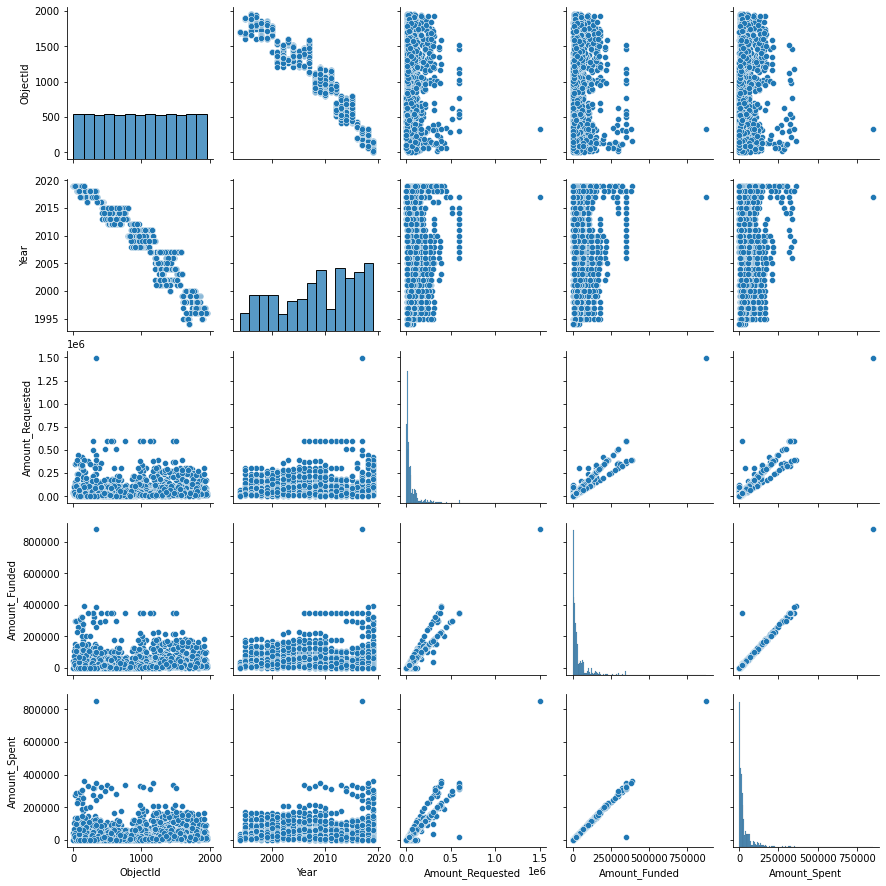

In [ ]:
sns.pairplot(df)

### Normalization

#### Min-Max Method

X_norm = (X - X_min)/(X_max-X_min)

In [ ]:
# copy the data
df_min_max_scaled = df[['Amount_Requested','Amount_Funded','Amount_Spent']]
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

      Amount_Requested  Amount_Funded  Amount_Spent
0             0.005467       0.005699      0.005595
1             0.034225       0.034451      0.017852
2             0.031120       0.031346      0.017852
3             0.000835       0.001824      0.001790
4             0.008112       0.010715      0.010518
...                ...            ...           ...
1953          0.063544       0.000000      0.000000
1954          0.113779       0.113986      0.108083
1955          0.024662       0.024890      0.025196
1956          0.021429       0.021657      0.021178
1957          0.020289       0.020517      0.020345

[1958 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### using sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#copy the data
df_min_max_scaled = df[['Amount_Requested','Amount_Funded','Amount_Spent']]

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_min_max_scaled), columns=df_min_max_scaled.columns)

df_norm

,Amount_Requested,Amount_Funded,Amount_Spent
0,0.005467,0.005699,0.005595
1,0.034225,0.034451,0.017852
2,0.031120,0.031346,0.017852
3,0.000835,0.001824,0.001790
4,0.008112,0.010715,0.010518
...,...,...,...
1953,0.063544,0.000000,0.000000
1954,0.113779,0.113986,0.108083
1955,0.024662,0.024890,0.025196
1956,0.021429,0.021657,0.021178


#### Z-score methods

X_std = (X-mean(X))/std(X)

In [ ]:
X_std = df[['Amount_Requested','Amount_Funded','Amount_Spent']]
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(X_std):
    # copy the dataframe
    df_std = X_std.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
X_std = z_score(X_std)

X_std

,Amount_Requested,Amount_Funded,Amount_Spent
0,-0.552450,-0.528017,-0.529357
1,-0.068689,-0.083330,-0.334020
2,-0.120932,-0.131353,-0.334020
3,-0.630373,-0.587958,-0.589985
4,-0.507956,-0.450447,-0.450896
...,...,...,...
1953,0.424496,-0.616165,-0.618517
1954,1.269516,1.146790,1.103895
1955,-0.229559,-0.231206,-0.216992
1956,-0.283950,-0.281204,-0.281025


#### Using sklearn

In [ ]:
X_std = df[['Amount_Requested','Amount_Funded','Amount_Spent']]
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(X_std), columns=X_std.columns)

df_std

,Amount_Requested,Amount_Funded,Amount_Spent
0,-0.552591,-0.528152,-0.529492
1,-0.068707,-0.083351,-0.334105
2,-0.120963,-0.131386,-0.334105
3,-0.630534,-0.588108,-0.590136
4,-0.508085,-0.450562,-0.451011
...,...,...,...
1953,0.424605,-0.616323,-0.618675
1954,1.269840,1.147083,1.104177
1955,-0.229618,-0.231265,-0.217048
1956,-0.284022,-0.281276,-0.281097


### Big Picture of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ObjectId          1958 non-null   int64  
 1   Year              1958 non-null   int64  
 2   Fund              1958 non-null   object 
 3   Workgroup         1958 non-null   object 
 4   Organization      1958 non-null   object 
 5   Program           1958 non-null   object 
 6   Program_Summary   1958 non-null   object 
 7   Amount_Requested  1958 non-null   float64
 8   Amount_Funded     1958 non-null   float64
 9   Amount_Spent      1958 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 153.1+ KB


In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ObjectId,Year,Amount_Requested,Amount_Funded,Amount_Spent
count,1958.00000,1958.00000,1958.00000,1958.00000,1958.00000
mean,979.50000,2008.66650,57728.08627,34950.70558,32948.06896
std,565.37023,7.21093,89039.43230,56722.95596,53269.50041
min,1.00000,1994.00000,350.00000,0.00000,0.00000
25%,490.25000,2003.00000,12747.60929,5525.00000,5264.00000
50%,979.50000,2010.00000,27814.20765,15982.50000,15116.50000
75%,1468.75000,2015.00000,63469.94536,40000.00000,37876.50000
max,1958.00000,2019.00000,1498126.70765,877303.00000,848901.00000
